In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [13]:
data = pd.read_csv('breast_cancer_data/breast-cancer-wisconsin.data', header=None)

In [15]:
data
columns = ['id','CT','U_cell_size','U_cell_shape',\
          'MA','S_cell_size', 'BN','BC',\
          'NN','Mitoses','class']
data.columns = columns
data.head()

,id,CT,U_cell_size,U_cell_shape,MA,S_cell_size,BN,BC,NN,Mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [19]:
data.isin(['?']).sum()
# 이런식으로 값 찾기!

id               0
CT               0
U_cell_size      0
U_cell_shape     0
MA               0
S_cell_size      0
BN              16
BC               0
NN               0
Mitoses          0
class            0
dtype: int64

In [22]:
idx = data[data['BN']=='?'].index
data[data['BN']=='?']

,id,CT,U_cell_size,U_cell_shape,MA,S_cell_size,BN,BC,NN,Mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [23]:
data = data.replace("?",0)

In [26]:
data.loc[idx] # 수정 완료!

,id,CT,U_cell_size,U_cell_shape,MA,S_cell_size,BN,BC,NN,Mitoses,class
23,1057013,8,4,5,1,2,0,7,3,1,4
40,1096800,6,6,6,9,6,0,7,8,1,2
139,1183246,1,1,1,1,1,0,2,1,1,2
145,1184840,1,1,3,1,2,0,2,1,1,2
158,1193683,1,1,2,1,3,0,1,1,1,2
164,1197510,5,1,1,1,2,0,3,1,1,2
235,1241232,3,1,4,1,2,0,3,1,1,2
249,169356,3,1,1,1,2,0,3,1,1,2
275,432809,3,1,3,1,2,0,2,1,1,2
292,563649,8,8,8,1,2,0,6,10,1,4


In [37]:
data.columns

Index(['id', 'CT', 'U_cell_size', 'U_cell_shape', 'MA', 'S_cell_size', 'BN',
       'BC', 'NN', 'Mitoses', 'class'],
      dtype='object')

In [38]:
data.cov()

,id,CT,U_cell_size,U_cell_shape,MA,S_cell_size,BC,NN,Mitoses,class
id,3.808071e+11,-96102.928115,-78340.852835,-76248.626523,-114317.920736,-62211.432529,-90358.286828,-98123.575673,-36937.718724,-47094.558137
CT,-9.610293e+04,7.928395,5.541164,5.477690,3.910308,3.253469,3.834057,4.607235,1.690389,1.917836
U_cell_size,-7.834085e+04,5.541164,9.311403,8.224213,6.147786,5.079791,5.622994,6.735683,2.400566,2.374186
U_cell_shape,-7.624863e+04,5.477690,8.224213,8.832265,5.796568,4.735926,5.333128,6.529071,2.237156,2.315207
MA,-1.143179e+05,3.910308,6.147786,5.796568,8.153191,3.791065,4.641975,5.260800,2.045230,1.892679
S_cell_size,-6.221143e+04,3.253469,5.079791,4.735926,3.791065,4.903124,3.326500,4.252278,1.819482,1.438219
BC,-9.035829e+04,3.834057,5.622994,5.333128,4.641975,3.326500,5.945620,4.958041,1.439312,1.755008
NN,-9.812358e+04,4.607235,6.735683,6.529071,5.260800,4.252278,4.958041,9.324680,2.243289,2.068952
Mitoses,-3.693772e+04,1.690389,2.400566,2.237156,2.045230,1.819482,1.439312,2.243289,2.941492,0.690405
class,-4.709456e+04,1.917836,2.374186,2.315207,1.892679,1.438219,1.755008,2.068952,0.690405,0.904919


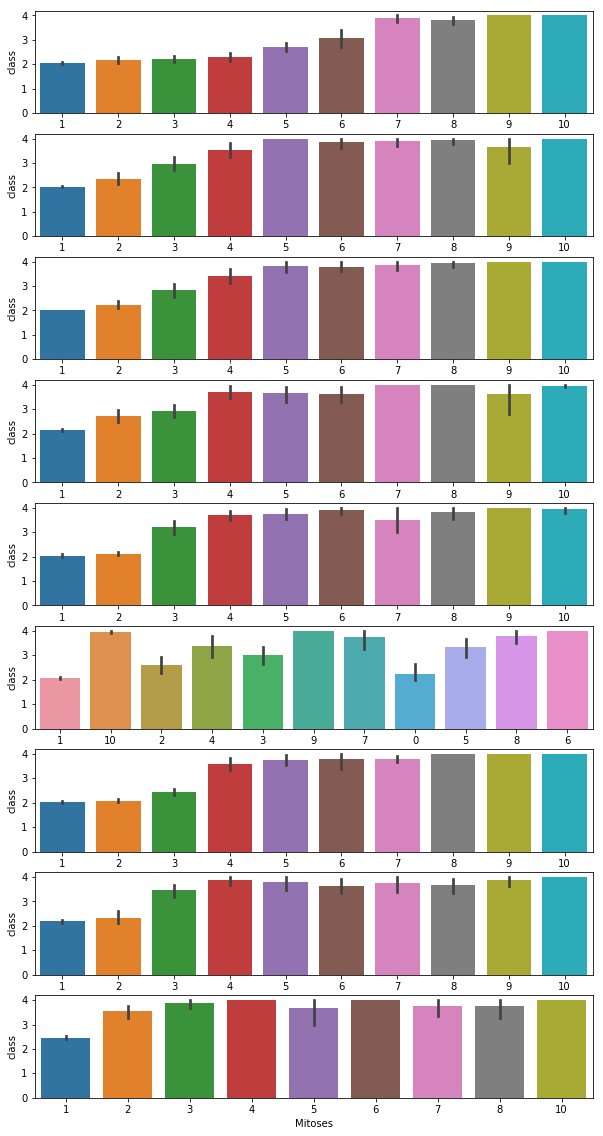

In [61]:
f, axes = plt.subplots(nrows=9,ncols=1, figsize=(10,20))
cols = ['CT', 'U_cell_size', 'U_cell_shape', 'MA', 'S_cell_size', 'BN',
       'BC', 'NN', 'Mitoses']

cnt = 0
for col in cols:
    sns.barplot(data=data, x=col, y='class', ax=axes[cnt])
    cnt += 1